# Other visualization

This notebook tries to explore visually some of the charateristics of the users and items, trying to answer questions like:

- Which regions have more demand of jobs?
- How industries are spread around the regions
- Which regions have higher level of education?
- How does the career level of XING users differ region to region?
- Other questions that we can think about...

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap, LogNorm

% matplotlib inline

Import users and items data

In [3]:
folderData = 'data/'
folderMaps = 'maps/'

In [4]:
# Import all users
users = pd.read_csv(folderData + 'users.csv', sep='\t')
users.columns = ['user_id', 'jobroles', 'career_level', 'discipline_id', 'industry_id', 'country', 'region',
                'experience_n_entries_class', 'experience_years_experience', 'experience_years_in_current',
                'edu_degree', 'edu_fieldofstudies', 'wtcj', 'premium']

In [5]:
# Import all items
items = pd.read_csv(folderData + 'items.csv', sep='\t')
items.columns = ['item_id', 'title', 'career_level', 'discipline_id', 'industry_id', 'country', 'is_payed', 'region',
                'latitude', 'longitude', 'employment', 'tags', 'created_at']
# Transform coordinates to numeric
items.latitude = pd.to_numeric(items.latitude, errors='coerce')
items.longitude = pd.to_numeric(items.longitude, errors='coerce')

# Fill empties and transform the strings into a list
items.title = items.title.fillna('0').apply(lambda str: str.split(','))
items.tags = items.tags.fillna('0').apply(lambda str: str.split(','))

## Question 1: where are the jobs?

In [6]:
pos = items[['longitude', 'latitude']]
pos = pos[(~pos.longitude.isnull()) & (~pos.latitude.isnull())]
lats = pos.latitude.values
lons = pos.longitude.values

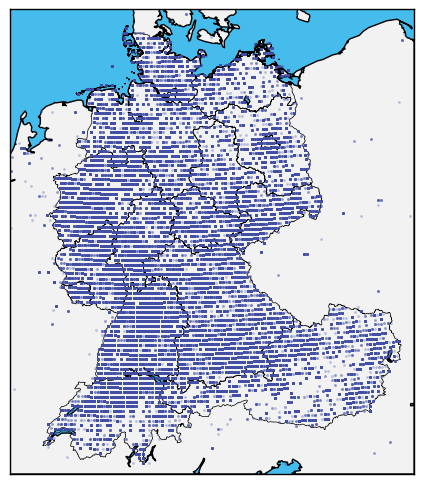

In [7]:
fig, ax = plt.subplots(figsize=(6,6))

m = Basemap(llcrnrlon=5.,llcrnrlat=45.50,urcrnrlon=19.0,urcrnrlat=55.,
             resolution='i', projection='tmerc', lat_0 = 50, lon_0 = 9)


m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile(folderMaps + 'DEU_adm_shp/DEU_adm1', 'DEU_adm1')
m.readshapefile(folderMaps + 'AUT_adm_shp/AUT_adm0', 'AUT_adm0')
m.readshapefile(folderMaps + 'CHE_adm_shp/CHE_adm0', 'CHE_adm0')

x, y = m(lons, lats)
m.plot(x, y, 'o', markersize=2, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.33)

plt.show()

As we cannot see very well as there is a lot of overlap, let's visualize it as a heat map

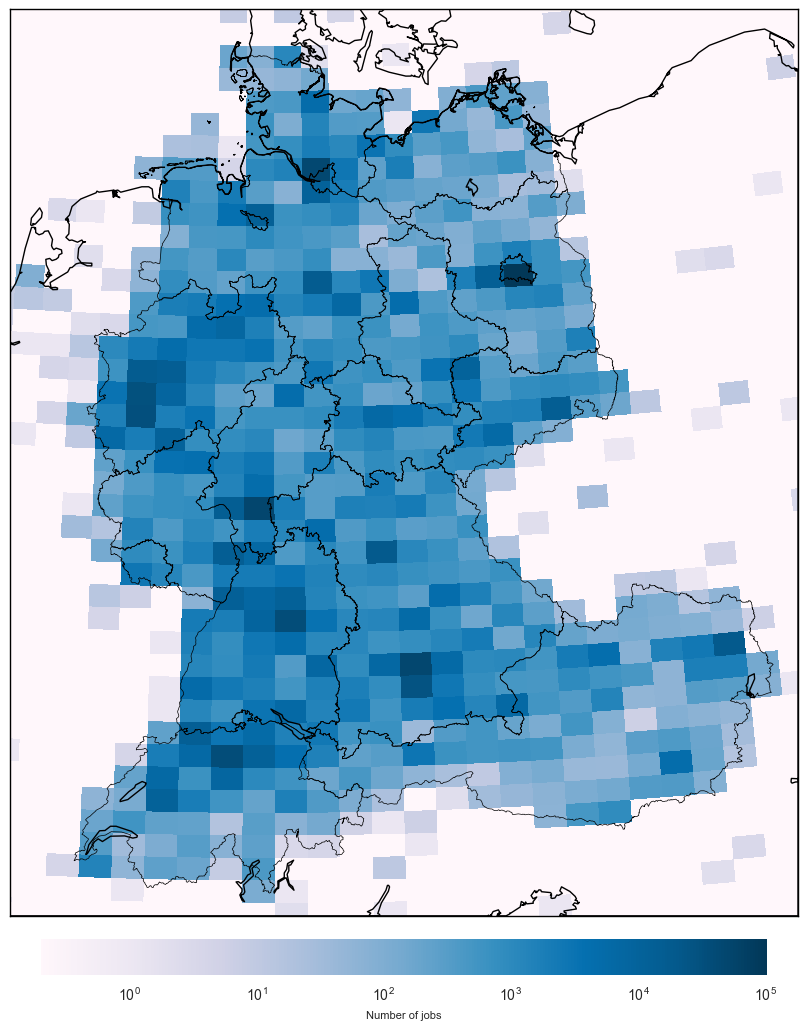

In [8]:
#fig, ax = plt.subplots(figsize=(6,6))

m = Basemap(llcrnrlon=5.,llcrnrlat=45.50,urcrnrlon=19.0,urcrnrlat=55.,
             resolution='i', projection='tmerc', lat_0 = 50, lon_0 = 9)

m.drawmapboundary(fill_color='#46bcec')
m.drawcoastlines()

m.readshapefile(folderMaps + 'DEU_adm_shp/DEU_adm1', 'DEU_adm1')
m.readshapefile(folderMaps + 'AUT_adm_shp/AUT_adm0', 'AUT_adm0')
m.readshapefile(folderMaps + 'CHE_adm_shp/CHE_adm0', 'CHE_adm0')

# compute appropriate bins to chop up the data:
db = 1 # bin padding
lon_bins = np.linspace(4, 29, 50) 
lat_bins = np.linspace(44, 56, 50) 

density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# Turn the lon/lat of the bins into 2 dimensional arrays ready
# for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh

# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density+1e-1, norm=LogNorm(vmin=2e-1, vmax=density.max()), cmap='PuBu')

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Number of jobs',size=8)

# make image bigger:
plt.gcf().set_size_inches(15,15)
plt.show()

Add the capitals of each region, to see if the high level of concentration of jobs is on the capitals

In [9]:
capitals = pd.DataFrame()
capitals['State'] = ['Baden-Württemberg', 'Bavaria', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Hesse', 'Mecklenburg-Vorpommern',
                     'Lower Saxony', 'North Rhine-Westphalia', 'Rhineland-Palatinate', 'Saarland', 'Saxony',
                    'Saxony-Anhalt', 'Schleswig-Holstein', 'Thuringia', 'SWITZERLAND', 'AUSTRIA']
capitals['Names'] = ['Stuttgart', 'Munich', 'Berlin', 'Potsdam', 'Bremen', 'Hamburg', 'Wiesbaden', 'Hanover', 
                   'Dusseldorf', 'Schwerin', 'Mainz', 'Saarbrucken', 'Dresden', 'Magdeburg', 'Kiel', 'Erfurt', 'Bern',
                    'Viena']
capitals['Lon'] = [9.1770200, 11.576124, 13.404954, 13.0656600, 8.806422, 9.9936825, 8.2397615, 11.4131600, 9.735603,
                  6.7761600, 8.2791000, 6.9816500, 13.7383200, 11.6291600, 10.1348900, 11.0328300, 7.44744, 16.3728]
capitals['Lat'] = [48.7823200, 48.137154, 52.520008, 52.3988600, 53.073635, 53.551086, 50.078217, 53.6293700,52.373920,
                  51.2217200, 49.9841900, 49.2354000, 51.0508900, 52.1277300, 54.3213300, 50.9787000, 46.94809, 48.2092]

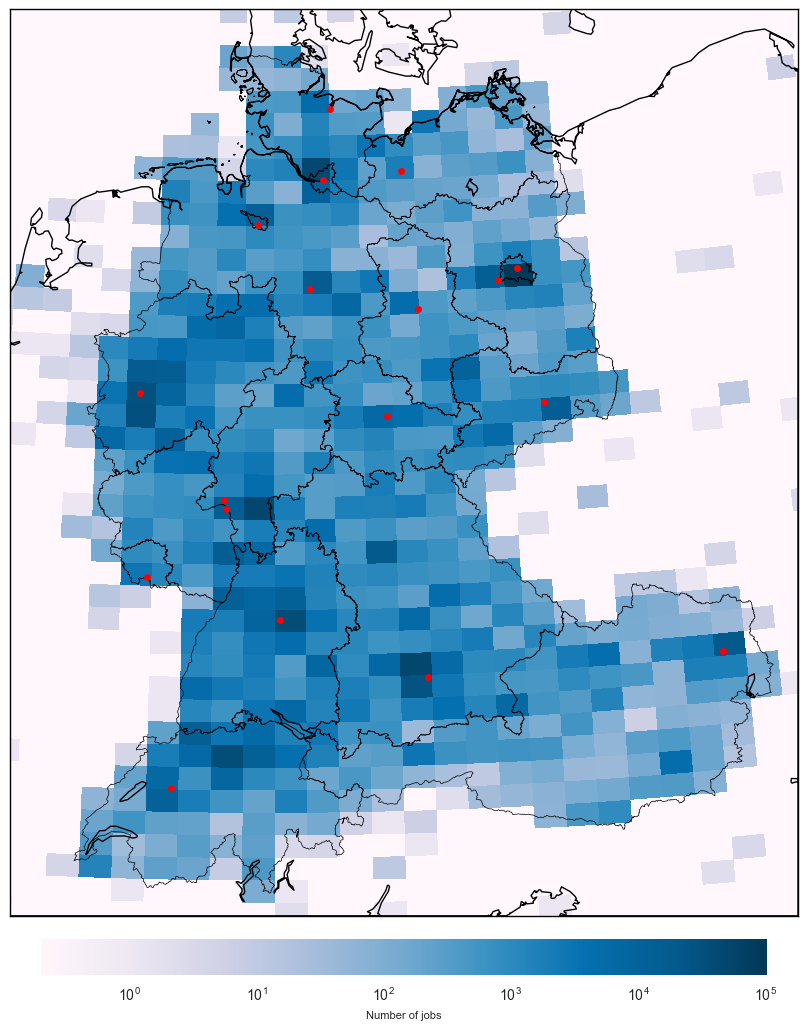

In [10]:
#fig, ax = plt.subplots(figsize=(6,6))

m = Basemap(llcrnrlon=5.,llcrnrlat=45.50,urcrnrlon=19.0,urcrnrlat=55.,
             resolution='i', projection='tmerc', lat_0 = 50, lon_0 = 9)

m.drawmapboundary(fill_color='#46bcec')
m.drawcoastlines()

m.readshapefile(folderMaps + 'DEU_adm_shp/DEU_adm1', 'DEU_adm1')
m.readshapefile(folderMaps + 'AUT_adm_shp/AUT_adm0', 'AUT_adm0')
m.readshapefile(folderMaps + 'CHE_adm_shp/CHE_adm0', 'CHE_adm0')

# compute appropriate bins to chop up the data:
db = 1 # bin padding
lon_bins = np.linspace(4, 29, 50) 
lat_bins = np.linspace(44, 56, 50) 

density, _, _ = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# Turn the lon/lat of the bins into 2 dimensional arrays ready
# for conversion into projected coordinates
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# convert the bin mesh to map coordinates:
xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh

# add histogram squares and a corresponding colorbar to the map:
plt.pcolormesh(xs, ys, density+1e-1, norm=LogNorm(vmin=2e-1, vmax=density.max()), cmap='PuBu')

cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Number of jobs',size=8)

x, y = m(capitals.Lon.values, capitals.Lat.values)
m.plot(x, y, 'ro', markersize=5)

# make image bigger:
plt.gcf().set_size_inches(15,15)
plt.show()

## Question 2: industries by region

In [11]:
industry = items[['industry_id', 'region']]
industry = industry[(industry.industry_id!=0) & (industry.region!=0)]
industry.head()

,industry_id,region
0,9,7
1,18,1
2,1,1
3,9,3
5,16,1


In [12]:
regions = pd.DataFrame()
regions['Num'] = range(1, 20)
regions['Names'] = ['Baden-Württemberg', 'Bavaria','Berlin','Brandenburg','Bremen','Hamburg','Hesse','Mecklenburg-Vorpommern','Lower Saxony','North Rhine-Westphalia','Rhineland-Palatinate','Saarland','Saxony','Saxony-Anhalt','Schleswig-Holstein','Thuringia', 'AUSTRIA', 'SWITZERLAND', 'Non_dach']

In [13]:
def fill_region(data, column, region):
    return data[data.region==region][column].value_counts()/len(data[data.region==region])*100

In [20]:
region_industry = pd.DataFrame()
for k in range(1, 17):
    region_industry[regions.Names[k-1]] = fill_region(industry, 'industry_id', k)

In [21]:
region_industry.sort_index(inplace=True)

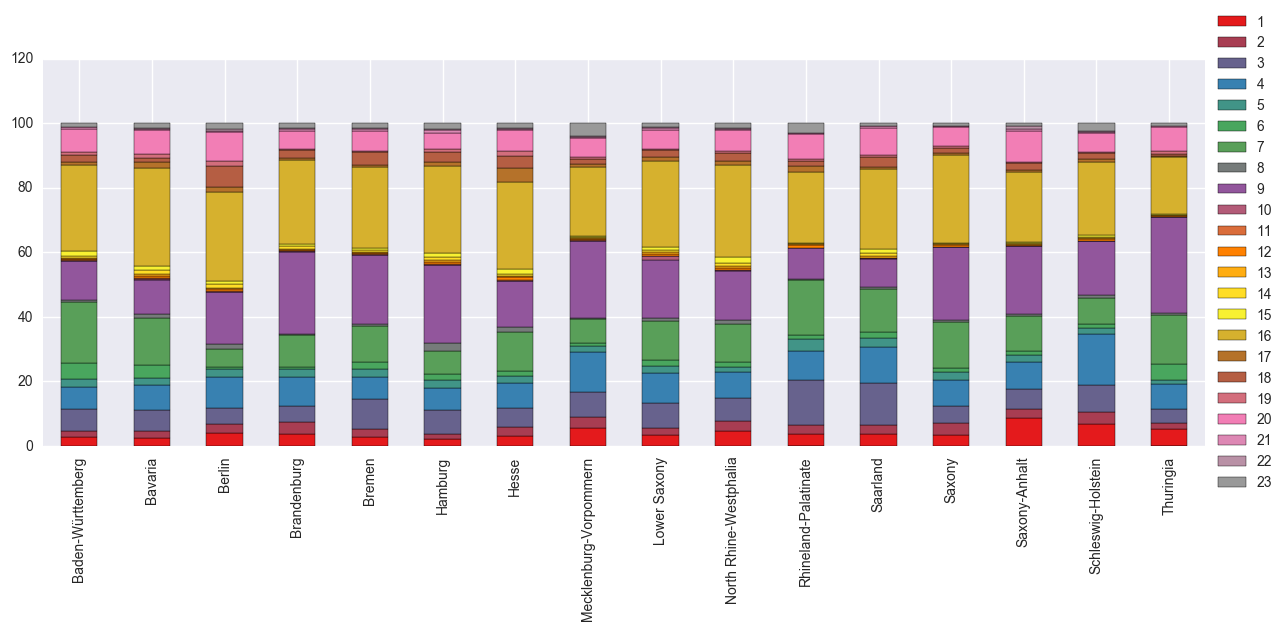

In [22]:
region_industry.transpose().plot.bar(stacked=True, colormap='Set1', figsize=(15, 5));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Question 3: education level and career level of users by regions

In [18]:
career_level = users[['career_level', 'region']]
career_level = career_level[(career_level.career_level!=0) & (career_level.region!=0)]

edu_degree = users[['edu_degree', 'region']]
edu_degree = edu_degree[(edu_degree.edu_degree!=0) & (edu_degree.region!=0)]

In [19]:
region_career_level = pd.DataFrame()
region_edu_degree = pd.DataFrame()
for k in range(1, 17):
    region_career_level[regions.Names[k-1]] = fill_region(career_level, 'career_level', k)
    region_edu_degree[regions.Names[k-1]] = fill_region(edu_degree, 'edu_degree', k)

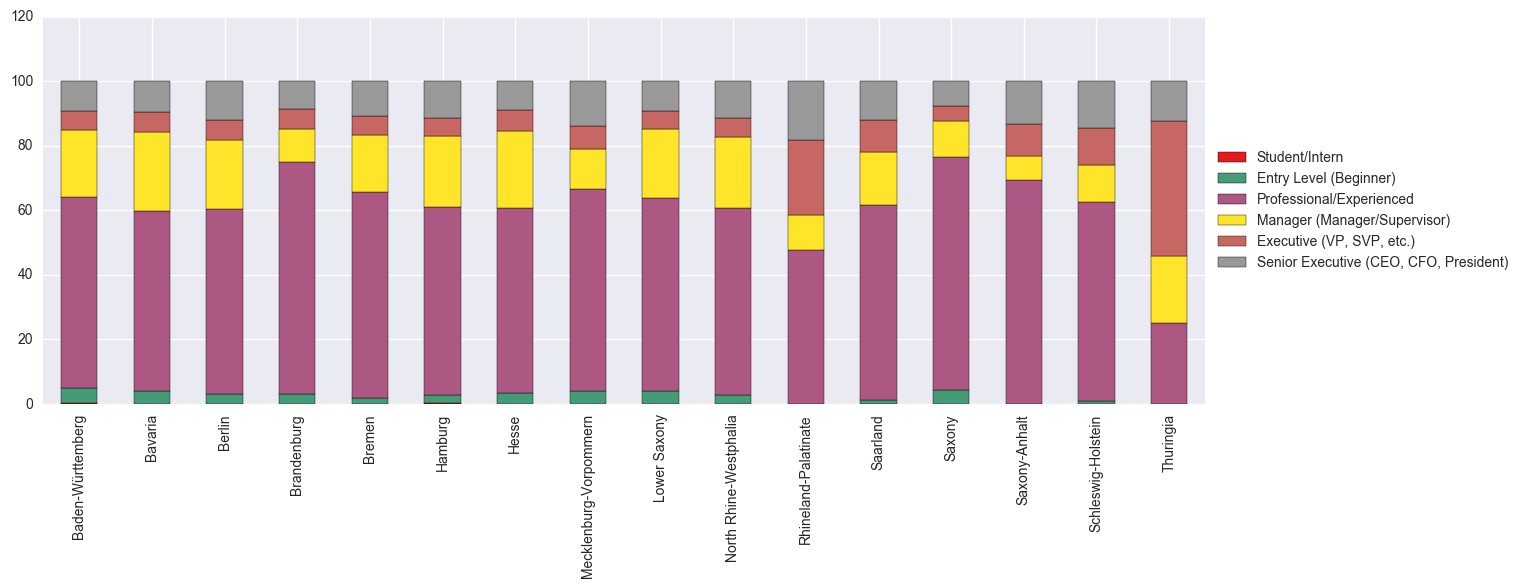

In [20]:
region_career_level.sort_index(inplace=True)
region_career_level = region_career_level.transpose()
region_career_level.columns = ['Student/Intern','Entry Level (Beginner)','Professional/Experienced','Manager (Manager/Supervisor)','Executive (VP, SVP, etc.)','Senior Executive (CEO, CFO, President)']
region_career_level.plot.bar(stacked=True, colormap='Set1', figsize=(15, 5));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

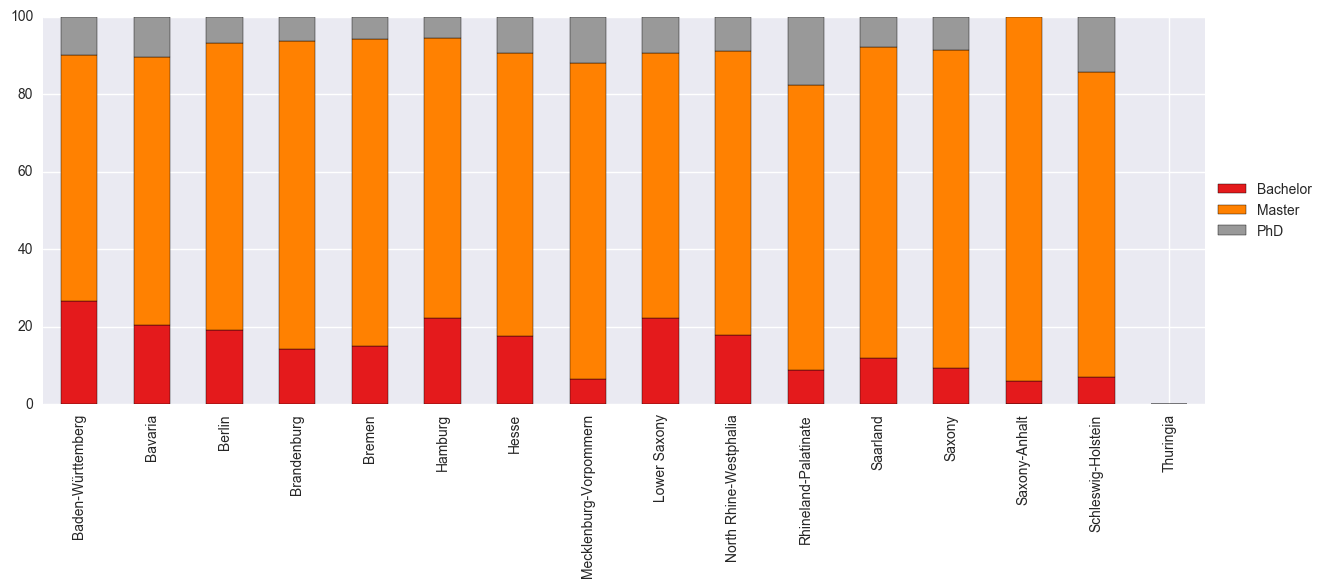

In [21]:
region_edu_degree.sort_index(inplace=True)
region_edu_degree = region_edu_degree.transpose()
region_edu_degree.columns = ['Bachelor','Master','PhD']
region_edu_degree.plot.bar(stacked=True, colormap='Set1', figsize=(15, 5));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

It is interesting to see that there are more users who have indicated that they have a masters than users who have indicated that they have only a bachelor

## Other cool visualisations

### tags

In [22]:
# Extract all the tags and create a single string
tags = [element for list_ in items.tags.values for element in list_]
# Let's use the first 10000 tags
tags = ' '.join(tags[:10000])

In [23]:
# Replace the letters for numbers, as for some unknown reason, the numbers do not work...
tags = tags.replace('0', 'a').replace('1', 'b').replace('2', 'c').replace('3', 'd').replace('4', 'e').replace('5', 'f').replace('6', 'g').replace('7', 'h').replace('8', 'i').replace('9', 'j')

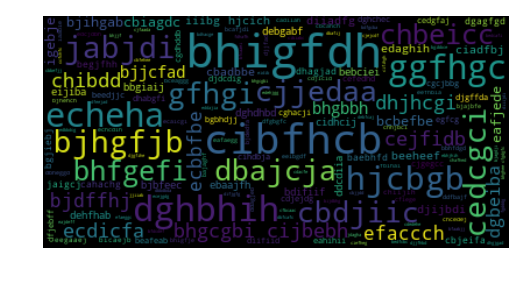

In [24]:
#from os import path
from wordcloud import WordCloud

# Read the whole text.
#text = open(path.join(d, 'constitution.txt')).read()

wordcloud = WordCloud(max_font_size=40).generate(tags)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

Does this graph coincide with the popularity of the tags?

In [25]:
from collections import Counter
most_common_tags = Counter(tags.split()).most_common()

In [26]:
most_common_tags[:50]

[('bhigfdh', 146),
 ('cibfhcb', 116),
 ('dghbhih', 111),
 ('ggfhgc', 83),
 ('echeha', 82),
 ('cjjedaa', 81),
 ('cedcgci', 67),
 ('hjcbgb', 66),
 ('bjhgfjb', 65),
 ('bhgcgbi', 61),
 ('jabjdi', 58),
 ('cijbebh', 58),
 ('dbajcja', 55),
 ('cbdjiic', 55),
 ('gfhgi', 53),
 ('cejfidb', 53),
 ('efaccch', 52),
 ('edaghih', 51),
 ('debgabf', 50),
 ('chbeicc', 50),
 ('bhfgefi', 49),
 ('ecdicfa', 49),
 ('chibdd', 49),
 ('dhjhcgi', 48),
 ('ebaajfh', 47),
 ('bcbefbe', 46),
 ('djijbdi', 45),
 ('bjdffhj', 44),
 ('cbiagdc', 43),
 ('eeechab', 42),
 ('dghdhbd', 42),
 ('ecbbfbe', 41),
 ('ciadfbj', 40),
 ('dgbeiba', 38),
 ('bjjcfad', 38),
 ('dehfhab', 38),
 ('bhgbbh', 38),
 ('bjihgab', 38),
 ('bjbfeec', 37),
 ('cidhcij', 37),
 ('eafjede', 37),
 ('dgagfgd', 36),
 ('igebje', 36),
 ('diiadfg', 36),
 ('hjcich', 36),
 ('beeheef', 35),
 ('iiibg', 35),
 ('eijiba', 34),
 ('cbadbbe', 34),
 ('bdifiif', 33)]